In [1]:
import torch

from melanoma_classification.model import get_dermmel_classifier_v1
from melanoma_classification.utils import (
    get_device,
    production_transform,
    train_transform,
)
from pathlib import Path
from training.trainer import train
from utils.dermmel import DermMel

In [ ]:
device = get_device()

## Create Vision Transformer (ViT)


In [3]:
vit = get_dermmel_classifier_v1()
vit.load_pretrained_weights("deit_base_patch16_224")

Using cache found in C:\Users\Qunor/.cache\torch\hub\facebookresearch_deit_main
c:\Users\Qunor\.pyenv-win-venv\envs\melanoma\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Qunor\.pyenv-win-venv\envs\melanoma\Lib\site-packages\timm\models\registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
c:\Users\Qunor\.pyenv-win-venv\envs\melanoma\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
C:\Users\Qunor/.cache\torch\hub\facebookresearch_deit_main\mod

## Prepare data


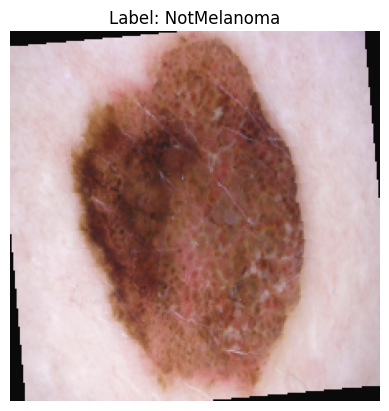

In [5]:
train_dataset = DermMel("../data", split="train_sep", transform=train_transform())
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=8, shuffle=True, num_workers=0
)

valid_dataset = DermMel("../data", split="valid", transform=production_transform())
valid_dataloader = torch.utils.data.DataLoader(
    valid_dataset, batch_size=8, shuffle=True, num_workers=0
)

train_dataset.visualize_image(-1)

## Training


In [6]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(
    [
        {"params": vit.cls_token, "lr": 1e-7},
        {"params": vit.pos_embed, "lr": 1e-7},
        {"params": vit.patch_embedding.parameters(), "lr": 1e-6},
        {"params": vit.transformer_layers.parameters(), "lr": 1e-5},
        {"params": vit.norm.parameters(), "lr": 1e-6},
        {"params": vit.classifier.parameters(), "lr": 1e-4},
    ]
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", patience=3, factor=0.1
)

In [8]:
train(
    model=vit,
    train_loader=train_dataloader,
    val_loader=valid_dataloader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=20,
    freezed_epochs=5,
    device=device,
    # checkpoint_model_file="checkpoint_epoch_6.pth",
    checkpoint_path=Path("checkpoints/dermmel_tmp"),
    save_every_n_epochs=1,
)

Epoch 1/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.59batch/s, val_accuracy=67.2, val_loss=0.0722]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_1.pth


Epoch 2/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.95batch/s, val_accuracy=70.6, val_loss=0.0723]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_2.pth


Epoch 3/20 [Validation]: 100%|██████████| 446/446 [00:27<00:00, 16.25batch/s, val_accuracy=70.6, val_loss=0.0692]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_3.pth


Epoch 4/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.95batch/s, val_accuracy=68.6, val_loss=0.0712]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_4.pth


Epoch 5/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.79batch/s, val_accuracy=71.9, val_loss=0.0677]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_5.pth
Unfroze norm.
Unfroze layer of transformers.


Epoch 6/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.66batch/s, val_accuracy=74.8, val_loss=0.0646]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_6.pth
Unfroze layer of transformers.
Unfroze layer of transformers.


Epoch 7/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.61batch/s, val_accuracy=79, val_loss=0.0559]  


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_7.pth
Unfroze layer of transformers.
Unfroze layer of transformers.


Epoch 8/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.62batch/s, val_accuracy=77.1, val_loss=0.0683]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_8.pth
Unfroze layer of transformers.
Unfroze layer of transformers.


Epoch 9/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.71batch/s, val_accuracy=81.6, val_loss=0.0512]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_9.pth
Unfroze layer of transformers.
Unfroze layer of transformers.


Epoch 10/20 [Validation]: 100%|██████████| 446/446 [00:27<00:00, 16.42batch/s, val_accuracy=79.6, val_loss=0.052] 


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_10.pth
Unfroze layer of transformers.
Unfroze layer of transformers.


Epoch 11/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.99batch/s, val_accuracy=81.2, val_loss=0.0519]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_11.pth
Unfroze layer of transformers.
Unfroze positional embedding.


Epoch 12/20 [Validation]: 100%|██████████| 446/446 [00:27<00:00, 16.44batch/s, val_accuracy=82.9, val_loss=0.046] 


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_12.pth
Unfroze cls_token.
Unfroze patch_embedding.


Epoch 13/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.65batch/s, val_accuracy=80.7, val_loss=0.0527]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_13.pth


Epoch 14/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.68batch/s, val_accuracy=84.8, val_loss=0.0433]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_14.pth


Epoch 15/20 [Validation]: 100%|██████████| 446/446 [00:27<00:00, 16.30batch/s, val_accuracy=83.4, val_loss=0.0451]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_15.pth


Epoch 16/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 17.05batch/s, val_accuracy=88, val_loss=0.0363]  


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_16.pth


Epoch 17/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.67batch/s, val_accuracy=86.7, val_loss=0.0407]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_17.pth


Epoch 18/20 [Validation]: 100%|██████████| 446/446 [00:27<00:00, 16.43batch/s, val_accuracy=87.7, val_loss=0.0359]


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_18.pth


Epoch 19/20 [Validation]: 100%|██████████| 446/446 [00:27<00:00, 16.20batch/s, val_accuracy=86.9, val_loss=0.038] 


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_19.pth


Epoch 20/20 [Validation]: 100%|██████████| 446/446 [00:26<00:00, 16.58batch/s, val_accuracy=84.6, val_loss=0.042] 


Checkpoint saved: checkpoints\dermmel2\checkpoint_epoch_20.pth
